## Stack Exchange Project

Goal: Identify data science topics to write about for data science learning website.

Questions Asked: Questions on actual problems with a specific answers. Not opinion-based and avoid lengthy discussions.
Home Page: Subdivided into Top Questions, All Questions, Tags, Users, and Unanswered Questions.


Useful fields in Posts: Id, PostTypeId, CreationDate, Tags, ViewCount, FavoriteCount, AnswerCount, CommentCount, Score

Post Type Query:

SELECT P.PostTypeId, PT.Name, COUNT(P.PostTypeId) AS NrOfPosts
FROM Posts P
JOIN PostTypes PT
ON PT.Id = P.PostTypeId
GROUP BY P.PostTypeId, PT.Name

Raw data query:

SELECT 
  Id, 
  PostTypeId,
  CreationDate, 
  Tags, 
  Score,
  ViewCount, 
  FavoriteCount, 
  AnswerCount, 
  CommentCount
FROM Posts
WHERE CreationDate BETWEEN '2019-01-01' AND '2020-01-01'
ORDER BY CreationDate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [2]:
raw_data = pd.read_csv('2019_questions.csv', parse_dates=['CreationDate'])
print(raw_data.info())
print(raw_data.isnull().sum())
raw_data.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB
None
Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64


,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN
5,44430,2019-01-23 11:13:32,0,283,<fuzzy-logic>,1,NaN
6,44432,2019-01-23 11:17:46,1,214,<time-series><anomaly-detection><online-learning>,0,1.0
7,44436,2019-01-23 12:49:39,0,9,<matrix-factorisation>,0,NaN
8,44437,2019-01-23 13:04:11,0,7,<correlation><naive-bayes-classifier>,0,NaN
9,44438,2019-01-23 13:16:29,0,584,<machine-learning><python><deep-learning><kera...,1,NaN


There 7,342 missing values in the FavoriteCount field. We can remove the NaN values or even drop this field and use ViewCount as the measure of popularity.

Tags field must be cleaned.

In [3]:
#fill-in missing values and convert FavoriteCount feature to int
topics = raw_data.copy()
topics = topics.fillna(0)
topics['FavoriteCount'] = topics.FavoriteCount.astype(int)
topics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [4]:
#clean Tags field

topics['Tags'] = topics.Tags.str.replace("<",",").str.replace(">","").str.strip(",").str.split(",")

topics.Tags.head()

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
Name: Tags, dtype: object

In [5]:
#count tag use

tag_count = dict()

for tags in topics.Tags:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

tag_count_df = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count_df.rename({0:'Count'}, axis=1, inplace=True)
tag_count_df = tag_count_df.Count.sort_values(ascending=False)
tag_count_df.head(20)

machine-learning          2693
python                    1814
deep-learning             1220
neural-network            1055
keras                      935
classification             685
tensorflow                 584
scikit-learn               540
nlp                        493
cnn                        489
time-series                466
lstm                       402
pandas                     354
regression                 347
dataset                    340
r                          268
predictive-modeling        265
clustering                 257
statistics                 234
machine-learning-model     224
Name: Count, dtype: int64

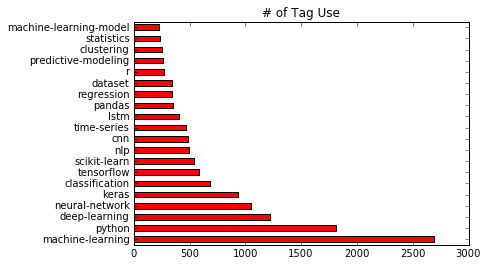

In [6]:
tag_count_df.head(20).plot.barh(color='red')
plt.title('# of Tag Use')

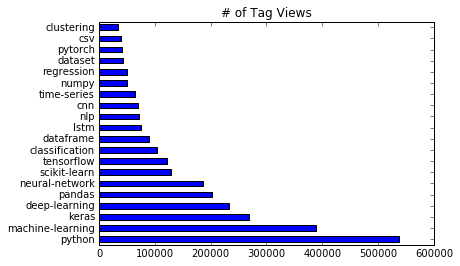

In [7]:
#count tag views

tag_views = dict()

for index, tags in enumerate(topics.Tags):
    for tag in tags:
        if tag in tag_views:
            tag_views[tag] += topics.ViewCount.iloc[index]
        else:
            tag_views[tag] = topics.ViewCount.iloc[index]
            
tag_views_df = pd.DataFrame.from_dict(tag_views, orient="index")
tag_views_df.rename({0:'Count'}, axis=1, inplace=True)
tag_views_df = tag_views_df.Count.sort_values(ascending=False)

tag_views_df.head(20).plot.barh(color='blue')
plt.title('# of Tag Views')

In [8]:
#enumerate function - returns index and values obtained from iterating over iterable
for i,c in enumerate(topics.Tags):
    print(i,c)

0 ['machine-learning', 'data-mining']
1 ['machine-learning', 'regression', 'linear-regression', 'regularization']
2 ['python', 'time-series', 'forecast', 'forecasting']
3 ['machine-learning', 'scikit-learn', 'pca']
4 ['dataset', 'bigdata', 'data', 'speech-to-text']
5 ['fuzzy-logic']
6 ['time-series', 'anomaly-detection', 'online-learning']
7 ['matrix-factorisation']
8 ['correlation', 'naive-bayes-classifier']
9 ['machine-learning', 'python', 'deep-learning', 'keras', 'cnn']
10 ['machine-learning']
11 ['machine-learning', 'theory']
12 ['machine-learning', 'gradient-descent']
13 ['nlp', 'clustering', 'feature-extraction', 'encoding', 'embeddings']
14 ['python', 'scikit-learn', 'pandas', 'numpy']
15 ['python', 'scikit-learn', 'decision-trees', 'accuracy', 'matlab']
16 ['python', 'pandas']
17 ['python', 'deep-learning', 'keras']
18 ['machine-learning', 'reinforcement-learning', 'q-learning', 'policy-gradients']
19 ['neural-network', 'deep-learning', 'image-classification']
20 ['r', 'logist

In [9]:
#count pairs of tags occuring the most together
from itertools import combinations
from collections import Counter

count = Counter()

for tags in topics.Tags:
    count.update(Counter(combinations(tags, 2)))
    
count.most_common(10)

[(('machine-learning', 'python'), 499),
 (('machine-learning', 'deep-learning'), 429),
 (('machine-learning', 'neural-network'), 366),
 (('neural-network', 'deep-learning'), 305),
 (('python', 'keras'), 280),
 (('machine-learning', 'classification'), 259),
 (('keras', 'tensorflow'), 255),
 (('deep-learning', 'keras'), 247),
 (('python', 'pandas'), 244),
 (('python', 'scikit-learn'), 235)]

In [10]:
#deep learning has been identified as the most popular topic but is it just a fad?

all_questions = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])
all_questions['Tags'] = all_questions.Tags.str.replace("<",",").str.replace(">","").str.strip(",").str.split(",")

all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


In [11]:
def deep_learning_questions(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
               "keras", "neural-network", "deep-learning"]:
            return 1
    return 0
all_questions['deep_learning'] = all_questions.Tags.apply(deep_learning_questions)

all_questions.sample(10)

,Id,CreationDate,Tags,deep_learning
18010,54257,2019-06-21 22:02:45,"[nlp, dataset]",0
13834,52405,2019-05-22 14:43:07,"[cnn, ocr]",1
11526,61424,2019-10-08 11:10:42,[machine-learning],0
10094,50857,2019-04-24 14:18:16,"[time-series, k-means, outlier, dbscan, anomaly]",0
5258,26779,2018-01-18 10:22:11,[machine-learning],0
18152,54296,2019-06-22 16:48:46,[normalization],0
10026,41878,2018-11-29 21:32:09,"[neural-network, nlp, word2vec, word-embedding...",1
6145,39861,2018-10-18 09:02:54,"[reinforcement-learning, probability]",0
14006,30981,2018-04-28 17:19:25,"[keras, time-series, lstm, multilabel-classifi...",1
16697,45302,2019-02-09 12:13:57,"[machine-learning, svm]",0


In [23]:
#remove 2020 and create field for quarterly view
all_questions = all_questions.loc[all_questions['CreationDate'].dt.year < 2020]

def quarter(datetime):
    year = str(datetime.year)[-2:]
    month = ((datetime.month-1) // 3) + 1
    return ("{0}Q{1}").format(year,month)

all_questions['Quarter'] = all_questions.CreationDate.apply(quarter)
quarter_group = all_questions.groupby('Quarter').agg({'deep_learning':["sum","size"]})
quarter_group.columns = ['deep_learning_questions','total_questions']
quarter_group['rate'] = quarter_group.deep_learning_questions / quarter_group.total_questions
quarter_group.reset_index(inplace=True)
quarter_group.sample(10)

,Quarter,deep_learning_questions,total_questions,rate
16,18Q2,566,1448,0.390884
3,15Q1,18,190,0.094737
9,16Q3,161,585,0.275214
13,17Q3,247,714,0.345938
17,18Q3,685,1512,0.453042
8,16Q2,109,518,0.210425
6,15Q4,66,382,0.172775
20,19Q2,935,2393,0.390723
2,14Q4,21,216,0.097222
18,18Q4,531,1294,0.410355


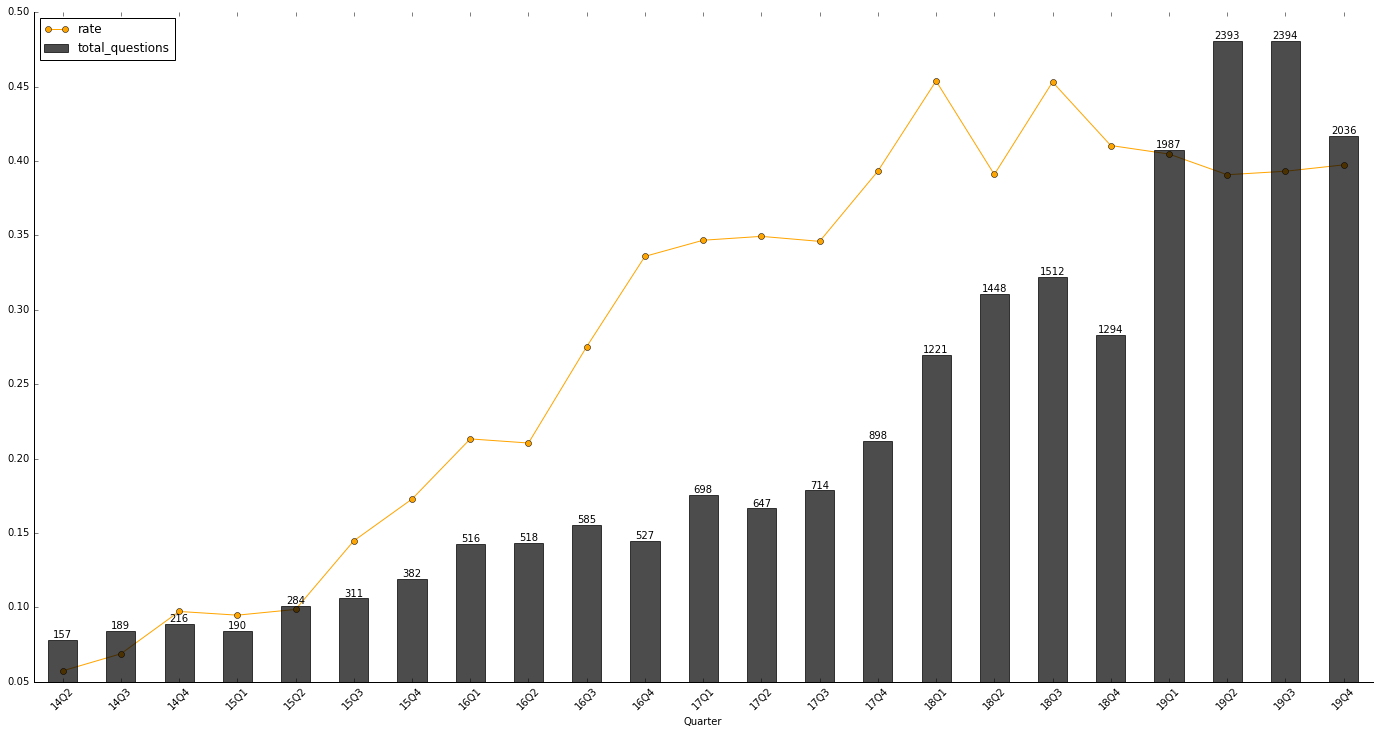

In [26]:
ax1 = quarter_group.plot(x="Quarter", y="rate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarter_group.plot(x="Quarter", y="total_questions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45, color="black")

for idx, t in enumerate(quarter_group["total_questions"]):
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)


It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing that we create deep learning content.